Lilianna Houston

Updated: 9/3/21

Gillespie Simulation 

Max Entropy Project

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Example A: Single Gene Auto Activation

In this example, we have 7 reactions. 1) Protein production, 2) protein degradation, 3/4) dimer creation/degradation, 5/6) gene activation/deactivation, 7) activated protein production.

In [3]:
# CONSTANTS
# g = rate of basic protein production
g = 5.0*10**(-3) # 1/s
# r = rate of protein degradation
r = 1.0*10**(-3) # 1/s
# f_d = forward dimer rate
f_d = 5.0*10**(-3) # 1/s
# b_d = backward dimer rate
b_d = 50.0 # 1/s
# f_p = forward bind rate to activate gene
f_p = 6.0*10**(-3) # 1/s
# b_p = backward bind rate to deactivate gene
b_p = 3.0*10**(-5) # 1/s
# g_star = rate rate of activated protein production
g_star = 50.0*10**(-3) # 1/s

In [11]:
# INITIAL CONDITION of CHANGING VARIABLES

proteins = []
times = []

# Gene switch: unactivated = false, activated = true
gene = False
# number of unactived gene
n_g_ua = 1
# number of actived gene
n_g_a = 0

# Number of Proteins
n_a = 0

# Number of dimers
n_a2 = 0

base_time = 0

main()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
def main():
    global gene, n_g_ua, n_g_a, n_a, n_a2, base_time
    i = 0
    while base_time < 10**6:
        # Random reaction variable
        rand_r = random.uniform(0, 1)
        # Random time variable
        rand_t = random.uniform(0, 1) 
        
        # Propensities
        # 1) Protein production 
        a1 = n_g_ua * g
        # 2) protein degradation
        a2 = n_a * r
        # 3) dimer creation 
        a3 = n_a * (n_a-1) * f_d # IS THIS CORRECT? OR IS IT JUST N_A?  
        # 4) dimer degradation
        a4 = n_a2 * b_d
        # 5) gene activation 
        a5 = n_g_ua * n_a2 * f_p
        # 6) gene deactivation
        a6 = n_g_a * b_p
        # 7) activated protein production
        a7 = n_g_a * g_star
        
        # Def vector of propensities
        props = np.array([a1, a2, a3, a4, a5, a6, a7])
        # Def vector of probabilities
        probs = props/np.sum(props) 
        # Calculate random time
        time = 1/(np.sum(props))*np.log(1/rand_t)
        base_time += time
        
        react = deter_reaction(rand_r, probs)
        
        if react != 0:
            reaction_switch(react)
        #print ("i:", i, "unactive gene:", n_g_ua, "active gene:", n_g_a, "proteins:", n_a, "dimers:", n_a2)        
        proteins.append(n_a)
        times.append(base_time)
        i += 1
        
    print ("proteins:", proteins)
    print ("base_time:", times)

In [6]:
# Probability Generator (useless tbh)
def prob_gen(prop):
    p = props[prop - 1] / np.sum(props)
    return (p)

In [7]:
# Reaction Selector 
def deter_reaction(rand_r, probs):
    c = 0
    s = 0
    while c < (len(probs) + 1):
        if s > rand_r:
            return c
        else:
            s += probs[c]
            c += 1
    return 0

In [8]:
##, gene, n_g_ua, n_g_a, n_a, n_a2
def reaction_switch(react):
    if react == 1:
        react_1()
    elif react == 2:
        react_2(),
    elif react == 3:
        react_3(),
    elif react == 4:
        react_4(),
    elif react == 5:
        react_5(),
    elif react == 6:
        react_6(),
    elif react == 7:
        react_7(),

In [9]:
def react_1():
    global gene, n_g_ua, n_g_a, n_a, n_a2
    n_a += 1
def react_2():
    global gene, n_g_ua, n_g_a, n_a, n_a2
    n_a -= 1
def react_3():
    global gene, n_g_ua, n_g_a, n_a, n_a2
    n_a -= 2
    n_a2 += 1
def react_4():
    global gene, n_g_ua, n_g_a, n_a, n_a2        
    n_a += 2
    n_a2 -= 1
def react_5():
    global gene, n_g_ua, n_g_a, n_a, n_a2
    n_a2 -= 1
    # Gene switch: unactivated = false, activated = true
    gene = True
    # number of unactived gene
    n_g_ua -= 1
    # number of actived gene
    n_g_a += 1
def react_6():
    global gene, n_g_ua, n_g_a, n_a, n_a2
    n_a2 += 1
    # Gene switch: unactivated = false, activated = true
    gene = False
    # number of unactived gene
    n_g_ua += 1
    # number of actived gene
    n_g_a -= 1
def react_7():
    global gene, n_g_ua, n_g_a, n_a, n_a2
    n_a += 1

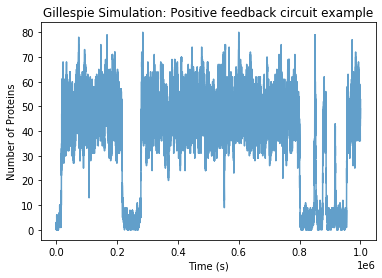

In [12]:
# plot
plt.plot(times, proteins, alpha=.7)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel("Time (s)")
plt.ylabel("Number of Proteins")
plt.title("Gillespie Simulation: Positive feedback circuit example")
plt.show()